* **Problem Satatement :-**
    * Test the claim that "Times of India article dated Jan 18, 2019 states that “After doing your Computer Science Engineering if you take up jobs as a Programming Analyst, Software Engineer, Hardware Engineer and Associate Engineer you can earn up to 2.5-3 lakhs as a fresh graduate.” "
* **Constarints :-** 
    * To minimze the time
* **Data Description :-**
    * The dataset was released by Aspiring Minds from the Aspiring Mind Employment Outcome 2015 (AMEO). The study is primarily limited  only to students with engineering disciplines. The dataset contains the employment outcomes of engineering graduates as dependent variables (Salary, Job Titles, and Job Locations) along with the standardized scores from three different areas – cognitive skills, technical skills and personality skills. The dataset also contains demographic features. The dataset  contains  around  40 independent variables and 4000 data points. The independent variables are both continuous and categorical in nature. The dataset contains a unique identifier for each candidate. Below mentioned table contains the details for the original dataset.

**Importing Required Libraries**

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from feature_engine.outliers import Winsorizer
import warnings
warnings.filterwarnings("ignore")


**Importing Dataset**

In [15]:
file_path = r"C:\Users\ADMIN\Downloads\data.xlsx - Sheet1.csv"
df = pd.read_csv(file_path)

In [13]:
df.head()

Unnamed: 0      ID     Salary          DOJ          DOL  \
0      train  203097   420000.0  6/1/12 0:00      present   
1      train  579905   500000.0  9/1/13 0:00      present   
2      train  810601   325000.0  6/1/14 0:00      present   
3      train  267447  1100000.0  7/1/11 0:00      present   
4      train  343523   200000.0  3/1/14 0:00  3/1/15 0:00   

                Designation    JobCity Gender           DOB  10percentage  \
0   senior quality engineer  Bangalore      f  2/19/90 0:00          84.3   
1         assistant manager     Indore      m  10/4/89 0:00          85.4   
2          systems engineer    Chennai      f   8/3/92 0:00          85.0   
3  senior software engineer    Gurgaon      m  12/5/89 0:00          85.6   
4                       get    Manesar      m  2/27/91 0:00          78.0   

   ... ComputerScience  MechanicalEngg  ElectricalEngg TelecomEngg  CivilEngg  \
0  ...              -1              -1              -1          -1         -1   
1  ...              -1              -1              -1          -1         -1   
2  ...              -1              -1              -1          -1         -1   
3  ...              -1              -1              -1          -1         -1   
4  ...              -1              -1              -1          -1         -1   

   conscientiousness agreeableness extraversion  nueroticism  \
0             0.9737        0.8128       0.5269      1.35490   
1            -0.7335        0.3789       1.2396     -0.10760   
2             0.2718        1.7109       0.1637     -0.86820   
3             0.0464        0.3448      -0.3440     -0.40780   
4            -0.8810       -0.2793      -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 39 columns]

In [4]:
df.shape

(3998, 39)

In [5]:
df.dtypes

Unnamed: 0                       object
ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64


### Data Preprocessing
**1. Handling with Missing Values**

In [6]:
df.isna().sum()

Unnamed: 0               0
ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
n

**Observation :- From above Non-Visualization method I can see in the dataset there is no missing values**

**2. Handling with duplicates rows/records**

In [7]:
df.duplicated().sum()

0

**Observation :- From above Non-Visualization I can see in the dataset there is no duplicates rows**

**3. Handling with Zero Variance Feature**

In [8]:
for i in df.columns:
    print(i, df[i].unique())

Unnamed: 0 ['train']
ID [203097 579905 810601 ... 355888 947111 324966]
Salary [ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  430000  660000   70000
  410000  550000   35000  115000  415000  265000  285000  245000  395000
  560000  700000  185000  160000  625000   85000  135000  785000  210000
  155000  355000  535000  690000  260000 1110000 1000000  505000  475000
  715000  820000   90000  720000 2600000  515000   55000  495000   65000
  655000  545000  520000  645000 1025000  775

In [9]:
df['Unnamed: 0'].unique()

array(['train'], dtype=object)

In [10]:
#df['Unnamed: 0'] containg only one value in feature , Dropping that feature will be more effective to analysis
df.drop('Unnamed: 0' , axis = 1 , inplace=True)

In [11]:
df.head()

ID   Salary        DOJ                  DOL               Designation  \
0  203097   420000 2012-06-01              present   senior quality engineer   
1  579905   500000 2013-09-01              present         assistant manager   
2  810601   325000 2014-06-01              present          systems engineer   
3  267447  1100000 2011-07-01              present  senior software engineer   
4  343523   200000 2014-03-01  2015-03-01 00:00:00                       get   

     JobCity Gender        DOB  10percentage                         10board  \
0  Bangalore      f 1990-02-19          84.3  board ofsecondary education,ap   
1     Indore      m 1989-10-04          85.4                            cbse   
2    Chennai      f 1992-08-03          85.0                            cbse   
3    Gurgaon      m 1989-12-05          85.6                            cbse   
4    Manesar      m 1991-02-27          78.0                            cbse   

   ...  ComputerScience  MechanicalEngg ElectricalEngg  TelecomEngg  \
0  ...               -1              -1             -1           -1   
1  ...               -1              -1             -1           -1   
2  ...               -1              -1             -1           -1   
3  ...               -1              -1             -1           -1   
4  ...               -1              -1             -1           -1   

   CivilEngg conscientiousness agreeableness  extraversion  nueroticism  \
0         -1            0.9737        0.8128        0.5269      1.35490   
1         -1           -0.7335        0.3789        1.2396     -0.10760   
2         -1            0.2718        1.7109        0.1637     -0.86820   
3         -1            0.0464        0.3448       -0.3440     -0.40780   
4         -1           -0.8810       -0.2793       -1.0697      0.09163   

   openess_to_experience  
0                -0.4455  
1                 0.8637  
2                 0.6721  
3                -0.9194  
4                -0.1295  

[5 rows x 38 columns]

**Observation :- df ['Unnamed: 0'] containg only one value in feature , Dropping that feature will be more effective to analysis.**

**4. Handling with Type Casting**

In [12]:
df.dtypes

ID                                int64
Salary                            int64
DOJ                      datetime64[ns]
DOL                              object
Designation                      object
JobCity                          object
Gender                           object
DOB                      datetime64[ns]
10percentage                    float64
10board                          object
12graduation                      int64
12percentage                    float64
12board                          object
CollegeID                         int64
CollegeTier                       int64
Degree                           object
Specialization                   object
collegeGPA                      float64
CollegeCityID                     int64
CollegeCityTier                   int64
CollegeState                     object
GraduationYear                    int64
English                           int64
Logical                           int64
Quant                             int64


**Observation :- From above analysis I can see all the features are having proper Data Type.**

**5. Handling with Outliers**

In [13]:
df_numeric = df.select_dtypes(include = ['int64' , 'float64'])
df_catagoric = df.select_dtypes(include=['object'])

In [14]:
numeric = ['ID' , 'CollegeID' , 'CollegeCityID' , 'ComputerScience' , 'MechanicalEngg' , 'ElectricalEngg' , 
           'TelecomEngg' , 'CivilEngg' , 'conscientiousness' ,'agreeableness' , 'extraversion' , 'nueroticism' ,
           'openess_to_experience' , 'ComputerProgramming' , 'ElectronicsAndSemicon']

df_numeric.drop(columns = numeric , axis = 1 , inplace = True)

In [15]:
df_numeric

Salary  10percentage  12graduation  12percentage  CollegeTier  \
0      420000         84.30          2007         95.80            2   
1      500000         85.40          2007         85.00            2   
2      325000         85.00          2010         68.20            2   
3     1100000         85.60          2007         83.60            1   
4      200000         78.00          2008         76.80            2   
...       ...           ...           ...           ...          ...   
3993   280000         52.09          2006         55.50            2   
3994   100000         90.00          2009         93.00            2   
3995   320000         81.86          2008         65.50            2   
3996   200000         78.72          2010         69.88            2   
3997   400000         70.60          2008         68.00            2   

      collegeGPA  CollegeCityTier  GraduationYear  English  Logical  Quant  \
0          78.00                0            2011      515      585    525   
1          70.06                0            2012      695      610    780   
2          70.00                0            2014      615      545    370   
3          74.64                1            2011      635      585    625   
4          73.90                0            2012      545      625    465   
...          ...              ...             ...      ...      ...    ...   
3993       61.50                0            2010      365      334    475   
3994       77.30                1            2013      415      410    535   
3995       70.00                0            2012      475      475    465   
3996       70.42                1            2014      450      410    320   
3997       68.00                1            2012      565      515    464   

        Domain  
0     0.635979  
1     0.960603  
2     0.450877  
3     0.974396  
4     0.124502  
...        ...  
3993  0.276047  
3994  0.881620  
3995  0.488348  
3996  0.744758  
3997  0.600057  

[3998 rows x 12 columns]

Salary                 Axes(0.125,0.77;0.352273x0.11)
10percentage        Axes(0.547727,0.77;0.352273x0.11)
12graduation          Axes(0.125,0.638;0.352273x0.11)
12percentage       Axes(0.547727,0.638;0.352273x0.11)
CollegeTier           Axes(0.125,0.506;0.352273x0.11)
collegeGPA         Axes(0.547727,0.506;0.352273x0.11)
CollegeCityTier       Axes(0.125,0.374;0.352273x0.11)
GraduationYear     Axes(0.547727,0.374;0.352273x0.11)
English               Axes(0.125,0.242;0.352273x0.11)
Logical            Axes(0.547727,0.242;0.352273x0.11)
Quant                  Axes(0.125,0.11;0.352273x0.11)
Domain              Axes(0.547727,0.11;0.352273x0.11)
dtype: object

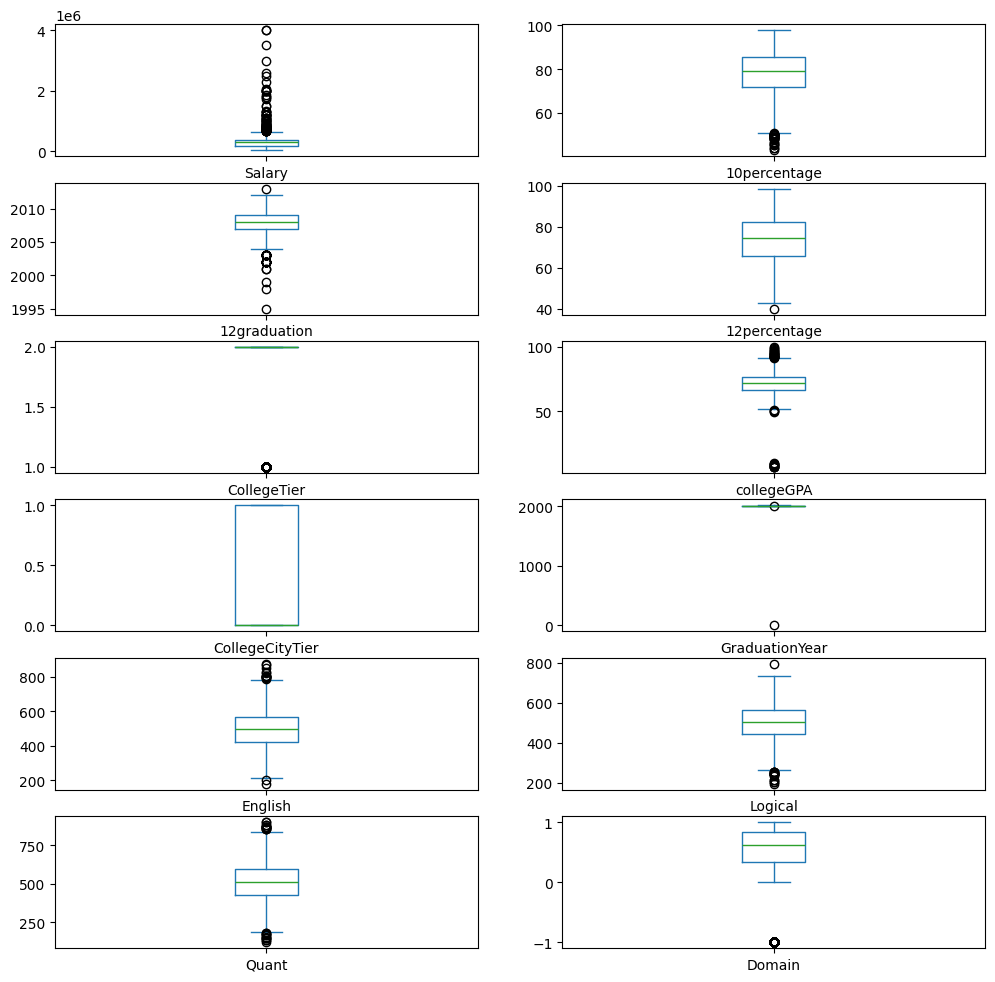

In [16]:
df_numeric.plot(kind='box' , subplots = True , layout = (6,2) , figsize = (12,12))

**Outliers Treatment :- I am using Winsorizer here to treat outliers Winsorizer is retain or replcae the outliers based on some statitical measure i have used here IQR, the outliers out of range of 25th and 75th percentile of data it will replace with inrange values**

In [17]:
from feature_engine.outliers import Winsorizer

In [18]:
wins = Winsorizer(capping_method='iqr' , tail='both' , fold=3)
wins.fit(df[['Salary']])
df[['Salary']] = wins.transform(df[['Salary']])

In [19]:
wins = Winsorizer(capping_method='iqr' , tail='both' , fold=2)
wins.fit(df[['collegeGPA']])
df[['collegeGPA']] = wins.transform(df[['collegeGPA']])

In [20]:
df['GraduationYear'] = df['GraduationYear'].replace(0 , df['GraduationYear'].median())

In [21]:
wins = Winsorizer(capping_method='iqr' , tail='both' , fold=1)
wins.fit(df[['GraduationYear']])
df[['GraduationYear']] = wins.transform(df[['GraduationYear']])

**6. Structural Error**

In [22]:
def gen(n):
    if n == 'f':
        return 'Female'
    else:
        return 'Male'

In [23]:
df['Gender'] = df['Gender'].apply(gen)

In [24]:
df['JobCity'] = df['JobCity'].str.capitalize()

In [25]:
df['Designation'] = df['Designation'].replace('systems engineer' , 'system engineer')

In [33]:
df['10board'].replace(0, df['10board'].mode()[0] ,inplace=True)

In [35]:
df['12board'].replace(0, df['12board'].mode()[0] , inplace=True)

* **Univariate Analysis**
* **Numeric Features**

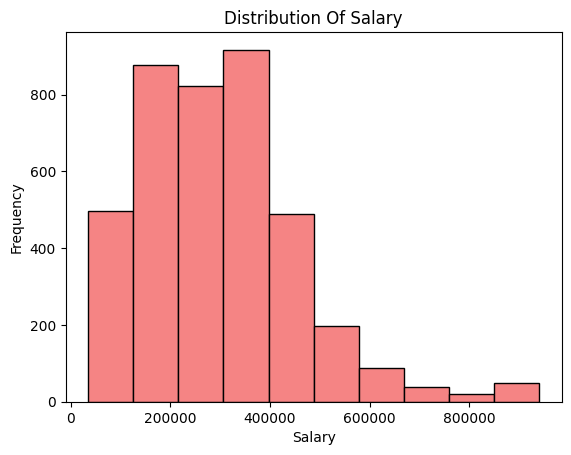

<Figure size 600x400 with 0 Axes>

In [36]:
plt.hist(df['Salary'], edgecolor='black' , color='#f58484')
plt.title('Distribution Of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees getting salaries between 2LPA to 4LPA**

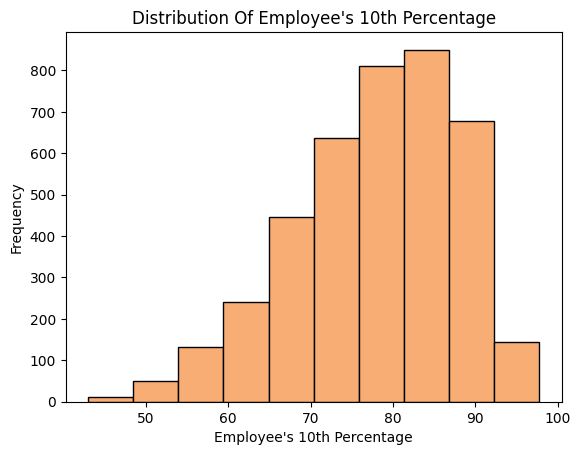

<Figure size 600x400 with 0 Axes>

In [37]:
plt.hist(df['10percentage'] , edgecolor='black' , color='#f7ad74')
plt.title("Distribution Of Employee's 10th Percentage")
plt.xlabel("Employee's 10th Percentage")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees had the 10th Percentage between 75-85%**

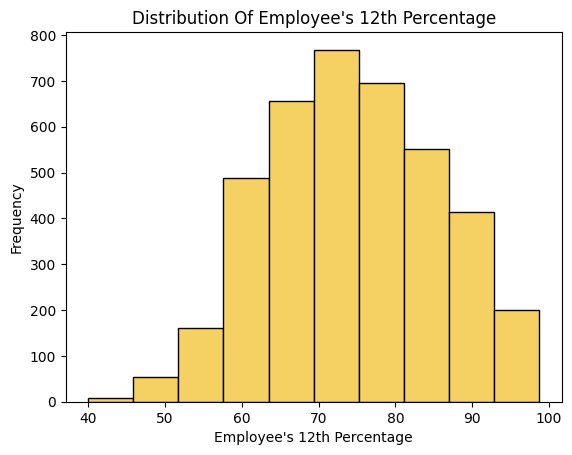

<Figure size 600x400 with 0 Axes>

In [38]:
plt.hist(df['12percentage'] , edgecolor='black' , color='#f5d164')
plt.title("Distribution Of Employee's 12th Percentage")
plt.xlabel("Employee's 12th Percentage")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees had the 12th Percentage between 70-80%**

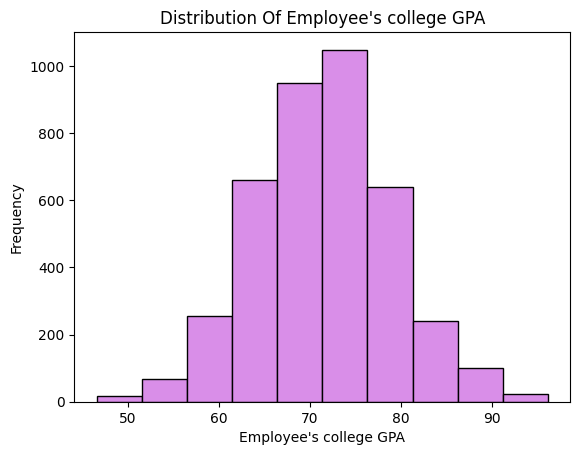

<Figure size 600x400 with 0 Axes>

In [39]:
plt.hist(df['collegeGPA'] , edgecolor='black' , color='#d98ee8')
plt.title("Distribution Of Employee's college GPA")
plt.xlabel("Employee's college GPA")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees had the college GPA between 65-75%**

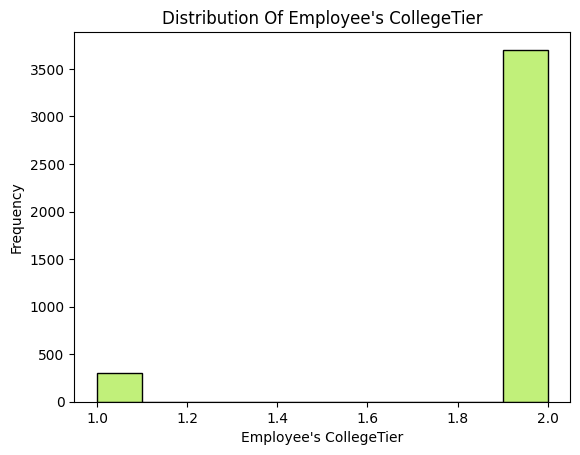

<Figure size 600x400 with 0 Axes>

In [40]:
plt.hist(df['CollegeTier'] , edgecolor='black' , color='#c1f07a')
plt.title("Distribution Of Employee's CollegeTier")
plt.xlabel("Employee's CollegeTier")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees has came from Tier 2 college**

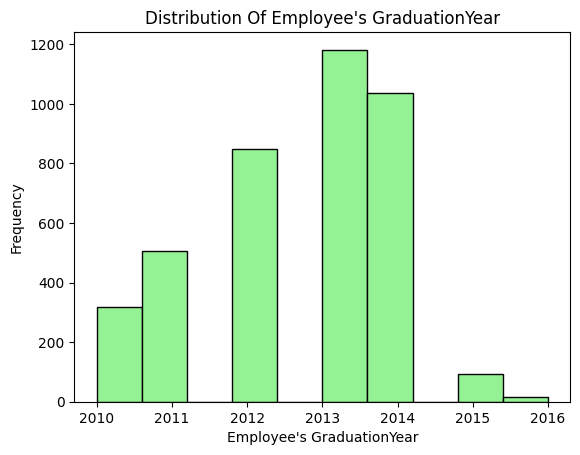

<Figure size 600x400 with 0 Axes>

In [41]:
plt.hist(df['GraduationYear'] , edgecolor='black' , color='#95f294')
plt.title("Distribution Of Employee's GraduationYear")
plt.xlabel("Employee's GraduationYear")
plt.ylabel("Frequency")
plt.figure(figsize=(6,4))
plt.show()

**Observation :- Most of the employees has completed their graduation in 2013 and 2014**

array([[<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>],
       [<Axes: ylabel='Frequency'>, <Axes: ylabel='Frequency'>]],
      dtype=object)

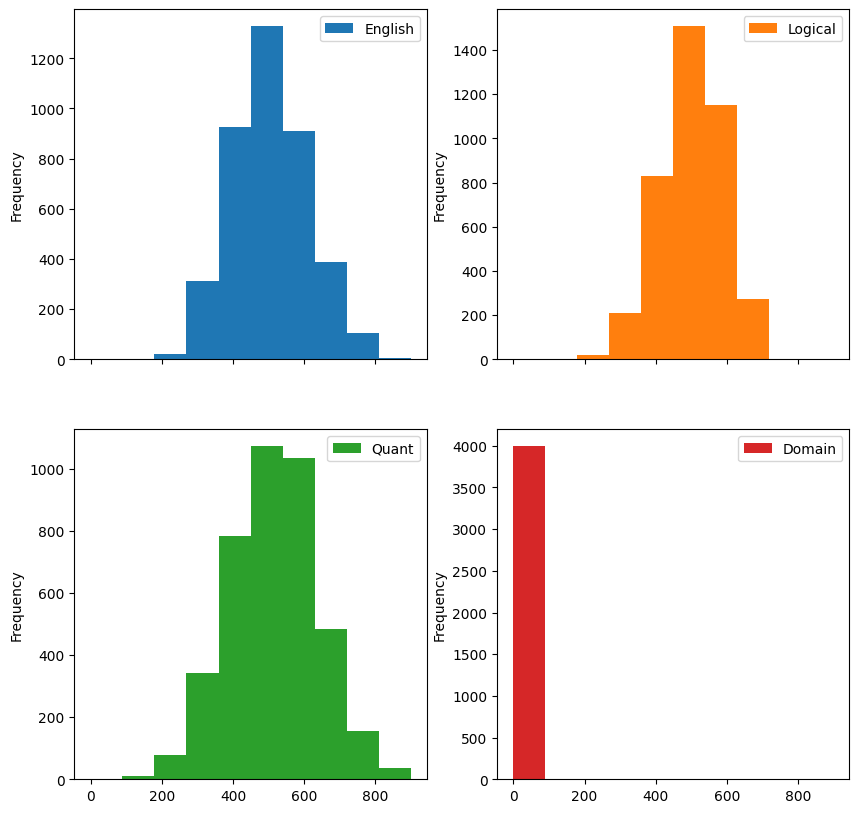

In [42]:
df[['English' , 'Logical' , 'Quant' , 'Domain']].plot(kind = 'hist' , subplots = True , layout = (2,2) , figsize=(10,10))

**Observation :-**
* Most of the employees has 400-600 marks in English.
* Most of the employees has 500-600 marks in Logical.
* Most of the employees has 400-650 marks in Quantative.
* All the employee has only 0-100 marks in Domain.

* **Univariate Analysis**
* **Catogaric Features**

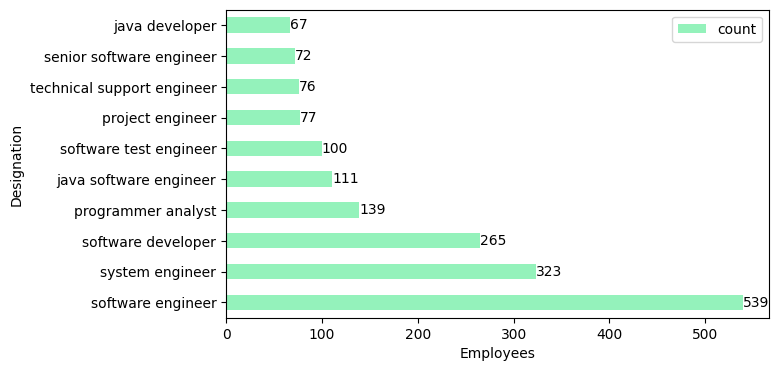

In [43]:
ax = pd.DataFrame(df['Designation'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#94f2bb' , figsize = (7,4) ,xlabel = 'Employees')
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employees near about 539 are on SOFTWARE ENGINEER'S Designation , So in SOFTWARE ENGINEER designation has more jobs as compare to another designations**

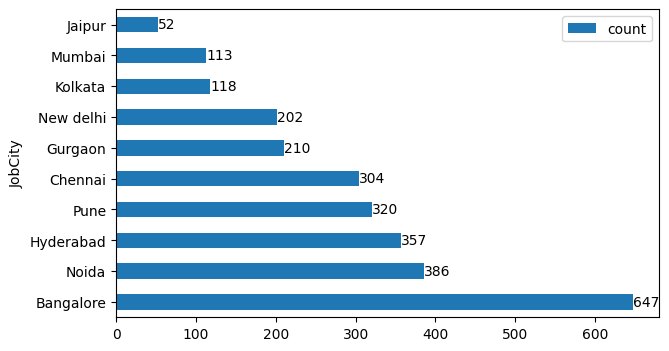

In [44]:
ax = pd.DataFrame(df['JobCity'].value_counts().nlargest(10)).plot(kind = 'barh' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of employees doing job in BANGLORE CITY , thats means BANGLORE has more jobs as compare to other cities.**

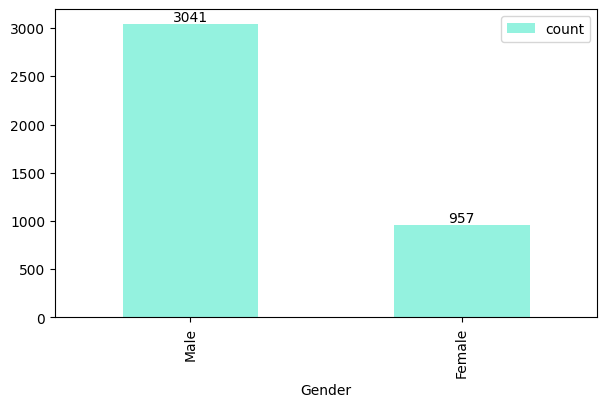

In [45]:
ax = pd.DataFrame(df['Gender'].value_counts().nlargest(10)).plot(kind = 'bar' , color='#94f2df' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Male Employee are more than Female Employee**
* Male--3040
* Female--957

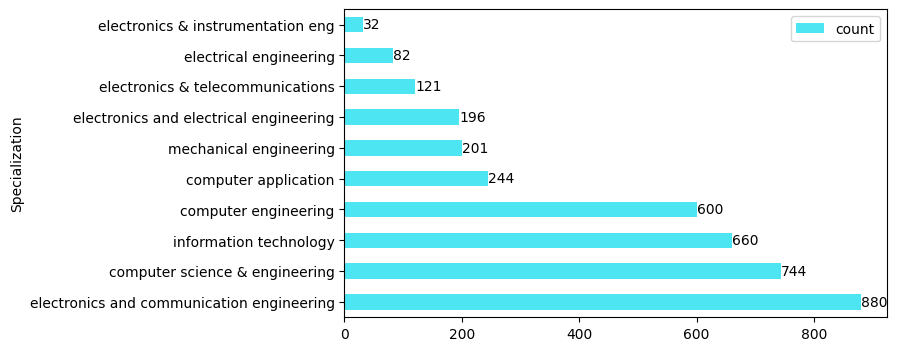

In [46]:
ax = pd.DataFrame(df['Specialization'].value_counts().nlargest(10)).plot(kind = 'barh' , color='#4ee5f2' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employees doin job has came from Electronics and Communication Engineering Branch**

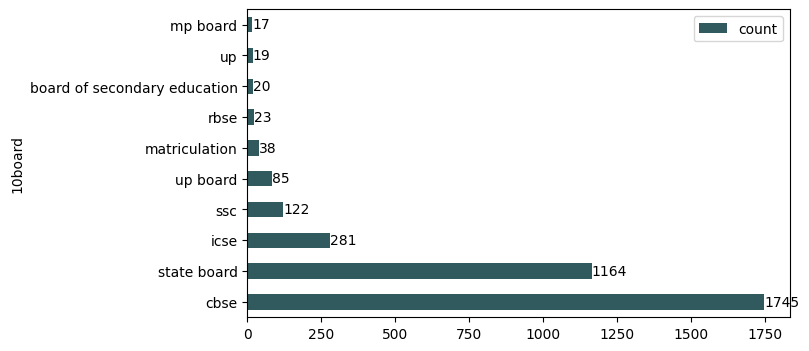

In [47]:
ax = pd.DataFrame(df['10board'].value_counts().nlargest(10)).plot(kind = 'barh', color='#305a5e' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee has completed their 10th from CBSE Board**

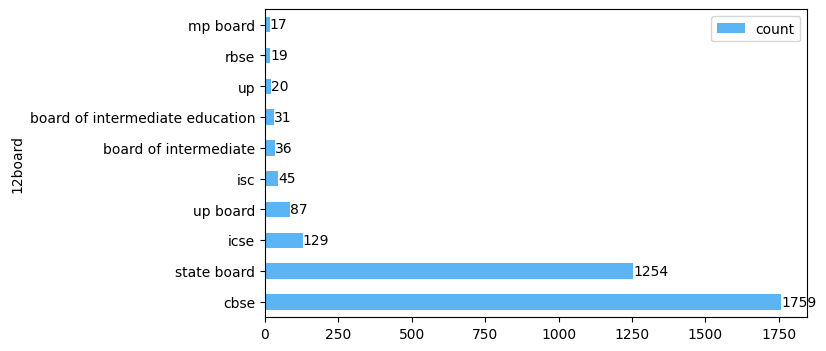

In [48]:
ax = pd.DataFrame(df['12board'].value_counts().nlargest(10)).plot(kind = 'barh', color='#5bb5f5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee has completed their 12th from CBSE Board**

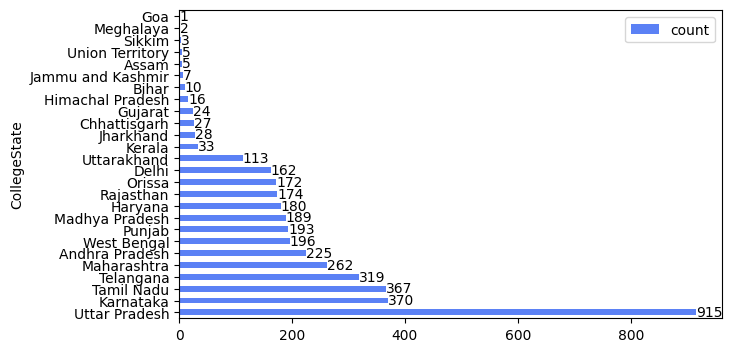

In [49]:
ax = pd.DataFrame(df['CollegeState'].value_counts()).plot(kind = 'barh', color='#5b81f5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee has completed their Graduation from Uttar Pradesh State**

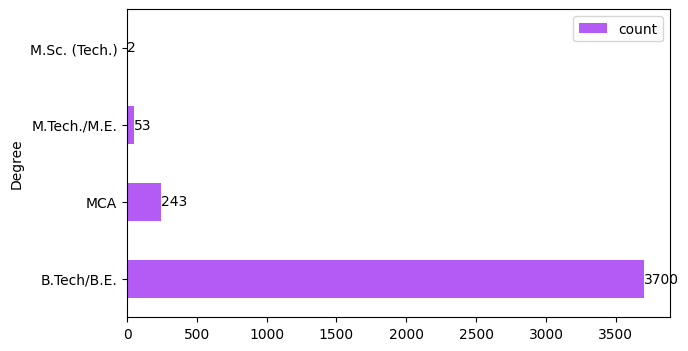

In [51]:
ax = pd.DataFrame(df['Degree'].value_counts()).plot(kind = 'barh', color='#b55bf5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee has completed their Graduation Degree in B.Tech/B.E**

* **Bi-Variate Analaysis**
* **Categoric Vs Categoric Features**

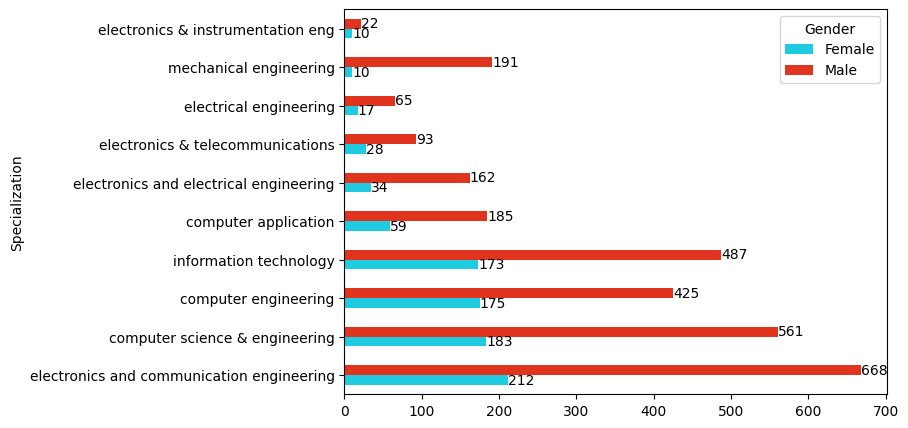

In [44]:
ax = pd.crosstab(df['Specialization'] , df['Gender']).nlargest(10 ,columns= df['Gender']).plot(kind='barh' , color=('#1ECBE1','#E1341E') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee are came from Electronic and Communication Engg near about 880 in that Male are 668 and Female are 212.**

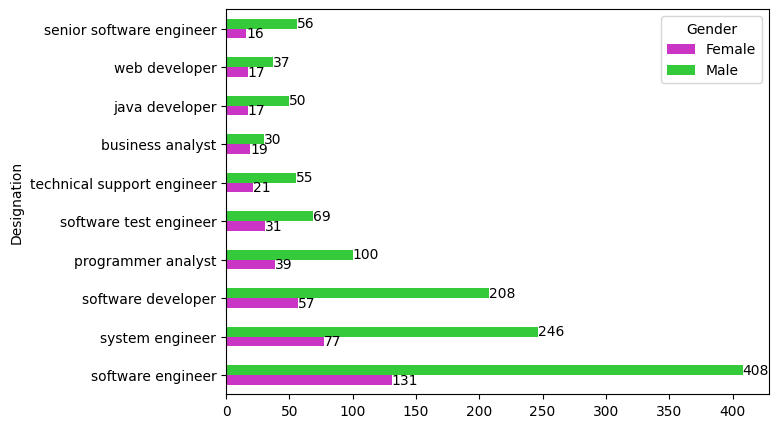

In [45]:
ax = pd.crosstab(df['Designation'] , df['Gender']).nlargest(10 ,columns= df['Gender']).plot(kind='barh' , color=('#CA35C5' , '#35CA3A') , figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee are having Software Engg Designation near about 539 in that Male are 408 and Female are 131.**

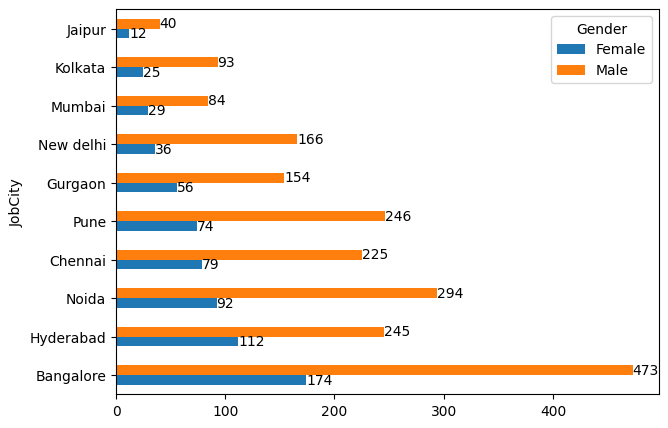

In [46]:
ax = pd.crosstab(df['JobCity'] , df['Gender'] ).nlargest(10 ,columns= df['Gender']).plot(kind='barh', figsize=(7,5))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Most of the employee doing job in Banglore near about 647 in that Male are 473 and Female are 174.**

* **Bi-Variate Analaysis**
* **Numeric Vs Numeric Features**

<Axes: xlabel='10percentage', ylabel='12percentage'>

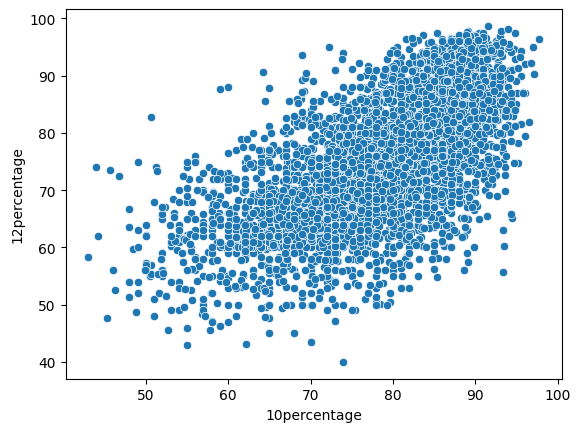

In [47]:
sns.scatterplot(data = df , x = '10percentage' , y = '12percentage')b

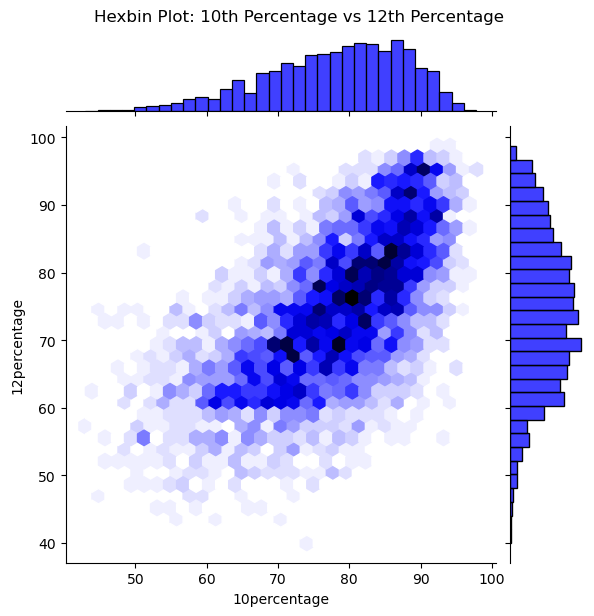

In [16]:
# Hexbin Plot
sns.jointplot(data=df, x='10percentage', y='12percentage', kind='hex', color='blue')
plt.suptitle('Hexbin Plot: 10th Percentage vs 12th Percentage', y=1.02)
plt.show()


**Observation :- There is a relationship between 10thPercentage and 12th Percentage of Employee, If 10th Percentage is increasing so 12th percentage is also increased.**

<Axes: xlabel='Salary', ylabel='CollegeTier'>

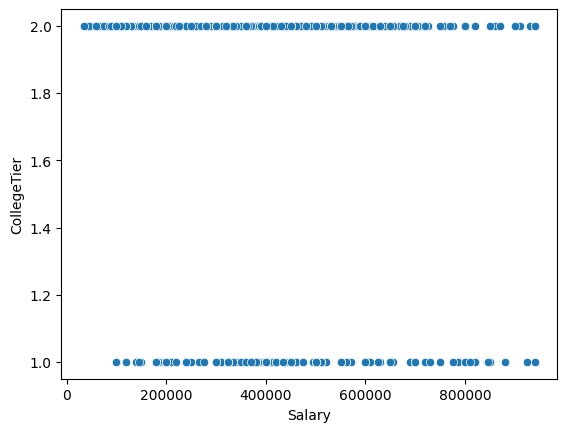

In [48]:
sns.scatterplot(data = df , x = 'Salary' , y = 'CollegeTier')

**Observation :- Tier 2 college Employees getting more salary than Tier 1 college employees**

<Axes: xlabel='Salary', ylabel='collegeGPA'>

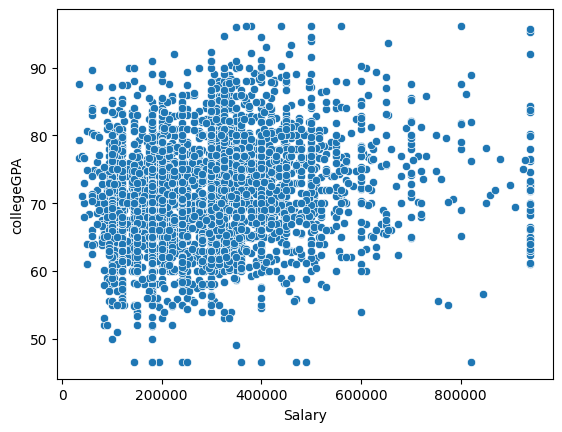

In [49]:
sns.scatterplot(data = df , x = 'Salary' , y = 'collegeGPA')

<Axes: xlabel='Salary', ylabel='English'>

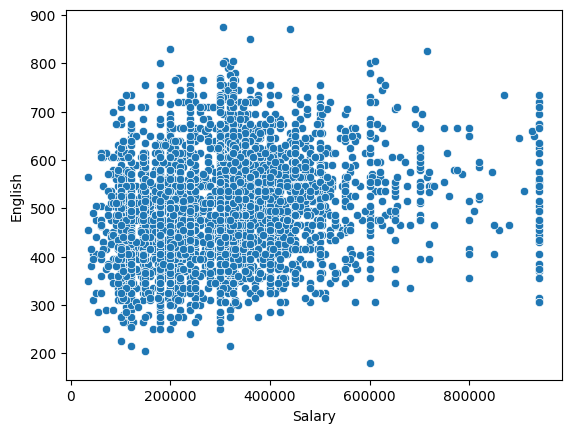

In [50]:
sns.scatterplot(data = df , x = 'Salary',  y = 'English')

* **Bi-Variate Analaysis**
* **Catagoric Vs Numeric Features**

**Which Degrees is earning more Salary?**

In [20]:
df['Degree'].value_counts()

Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

**Which Degree is giving more salary**

In [21]:
df_degree=df.groupby('Degree')['Salary'].max().sort_values(ascending=False).reset_index()

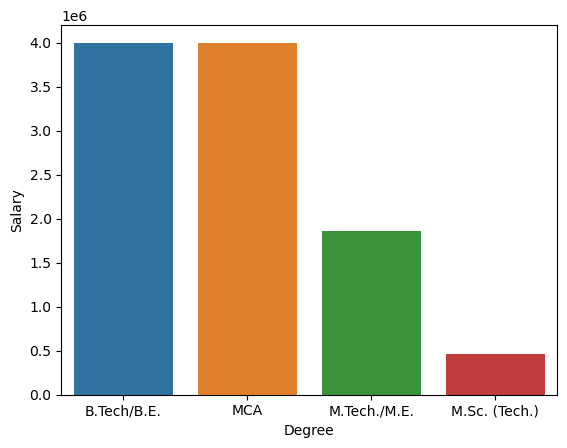

In [22]:
sns.barplot(x='Degree',y='Salary',data=df_degree)
plt.show()

In [23]:
df['GraduationYear']=df['GraduationYear'].replace(0,2014)

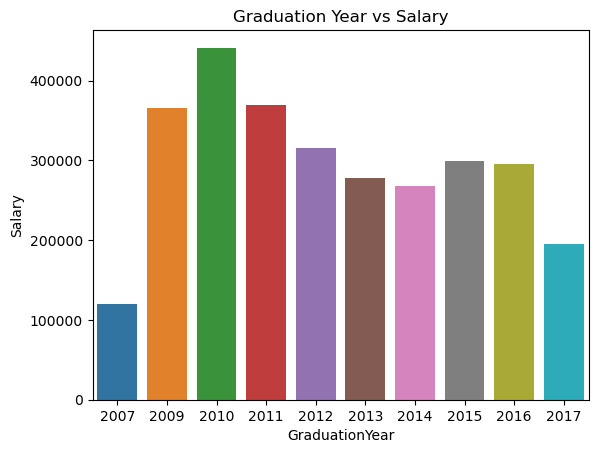

In [24]:
grad_df=df.groupby('GraduationYear')['Salary'].mean().reset_index()
sns.barplot(x='GraduationYear',y='Salary',data=grad_df)
plt.title('Graduation Year vs Salary')
plt.show()

<Axes: ylabel='Designation'>

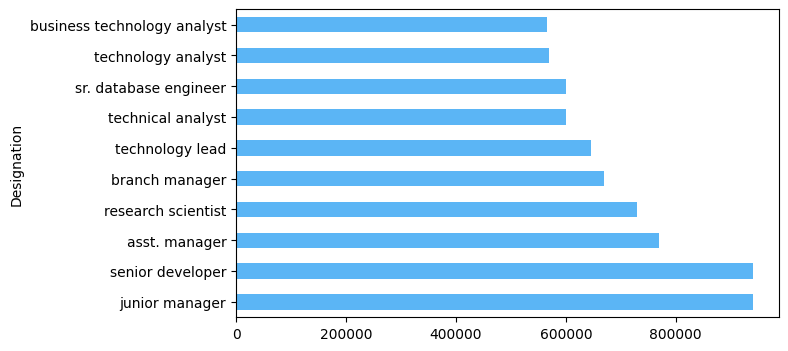

In [51]:
df.groupby('Designation')['Salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh', color='#5bb5f5' , figsize = (7,4))

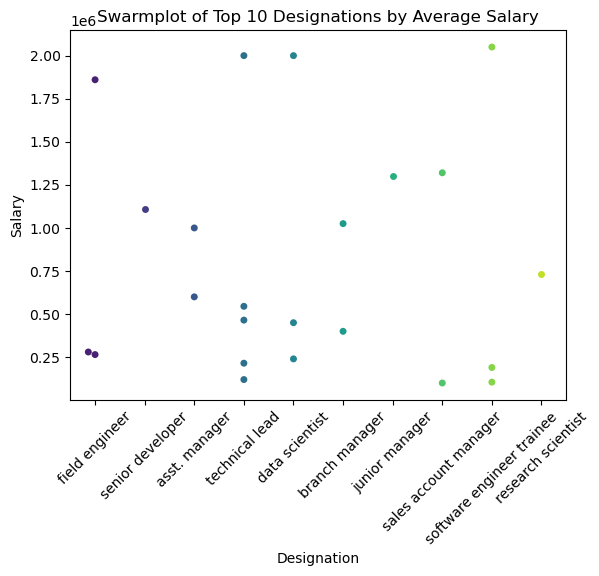

In [34]:
top_10_designations = df.groupby('Designation')['Salary'].mean().sort_values(ascending=False).nlargest(10).index

# Create a swarmplot
sns.swarmplot(x='Designation', y='Salary', data=df[df['Designation'].isin(top_10_designations)], palette='viridis')

plt.title('Swarmplot of Top 10 Designations by Average Salary')
plt.xlabel('Designation')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

**Obseravtion :- JUNIOR MANAGER Designation Getting More salaries as compare to all designations.**

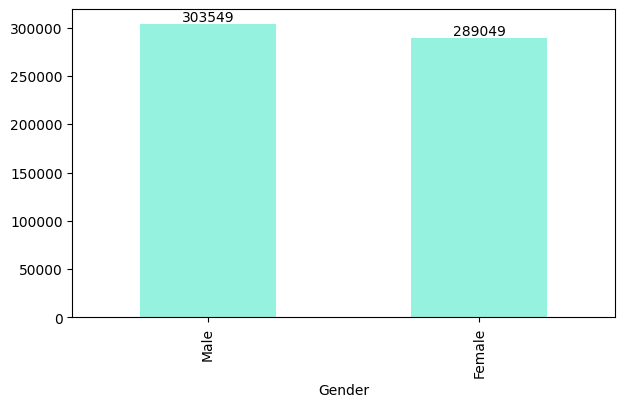

In [52]:
ax = df.groupby('Gender')['Salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='bar', color='#94f2df' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Female are less than Male but when it come to salaries , Average salary for male is high but female getting near about high salaries.**

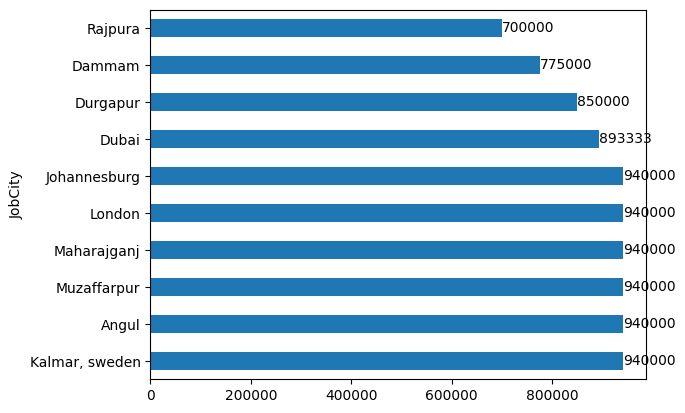

In [53]:
ax = df.groupby('JobCity')['Salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh')
for i in ax.containers:
    ax.bar_label(i)

**Observation :- SWEDEN , ANGUL , MUZAFFARPUR , LONDON ,JOHANNESBURG city providing more average salaries to employees.**

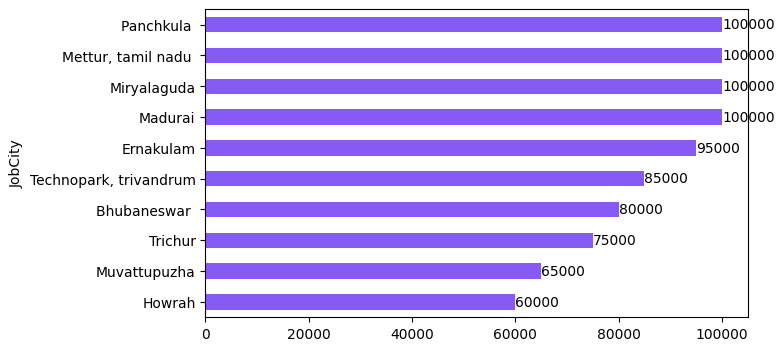

In [54]:
ax = df.groupby('JobCity')['Salary'].mean().sort_values(ascending = False).nsmallest(10).plot(kind='barh', color='#865bf5' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- HOWRAH , MUVATTUPUZA city providing less average salaries to employees**

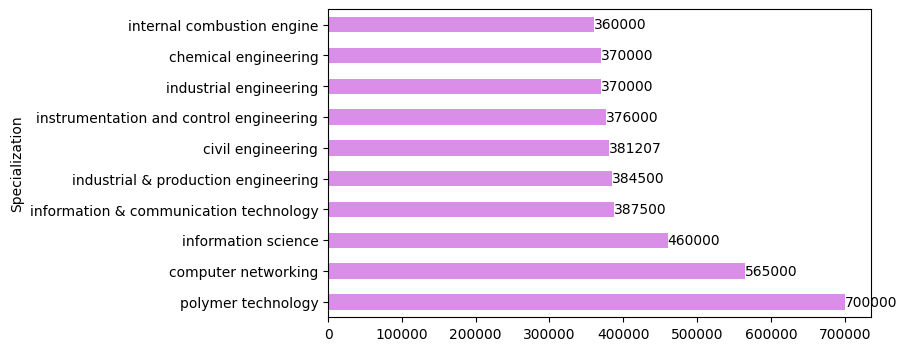

In [55]:
ax = df.groupby('Specialization')['Salary'].mean().sort_values(ascending = False).nlargest(10).plot(kind='barh' , color='#d98ee8' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Employees getting more average salary who has completed their Graduation in Polymer Technology Branch.**

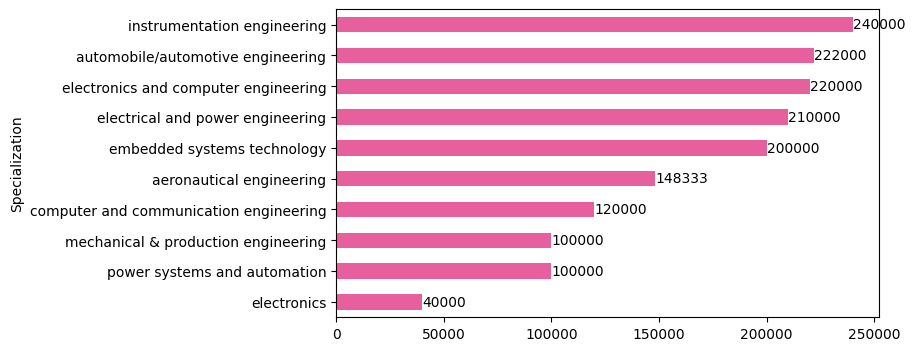

In [56]:
ax = df.groupby('Specialization')['Salary'].mean().sort_values(ascending = False).nsmallest(10).plot(kind='barh', color='#e85f9d' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- Employees getting less average salary who has completed their Graduation in Electronics branch.**

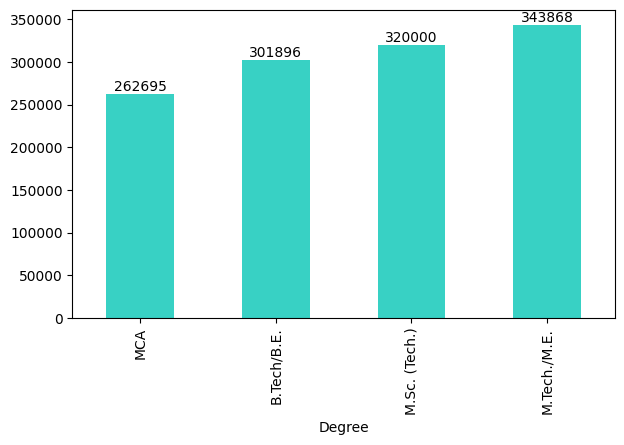

In [57]:
ax = df.groupby('Degree')['Salary'].mean().sort_values(ascending = False).nsmallest(10).plot(kind='bar', color='#38d1c4' , figsize = (7,4))
for i in ax.containers:
    ax.bar_label(i)

**Observation :- People are earning more who has completed their M.Tech/M.E as compare to MSC , Btech , MCA.**

**Multi-Variate Analysis**

In [53]:
df_numeric.describe()

Salary  10percentage  12graduation  12percentage  CollegeTier  \
count  3.998000e+03   3998.000000   3998.000000   3998.000000  3998.000000   
mean   3.076998e+05     77.925443   2008.087544     74.466366     1.925713   
std    2.127375e+05      9.850162      1.653599     10.999933     0.262270   
min    3.500000e+04     43.000000   1995.000000     40.000000     1.000000   
25%    1.800000e+05     71.680000   2007.000000     66.000000     2.000000   
50%    3.000000e+05     79.150000   2008.000000     74.400000     2.000000   
75%    3.700000e+05     85.670000   2009.000000     82.600000     2.000000   
max    4.000000e+06     97.760000   2013.000000     98.700000     2.000000   

        collegeGPA  CollegeCityTier  GraduationYear      English      Logical  \
count  3998.000000      3998.000000     3998.000000  3998.000000  3998.000000   
mean     71.486171         0.300400     2012.105803   501.649075   501.598799   
std       8.167338         0.458489       31.857271   104.940021    86.783297   
min       6.450000         0.000000        0.000000   180.000000   195.000000   
25%      66.407500         0.000000     2012.000000   425.000000   445.000000   
50%      71.720000         0.000000     2013.000000   500.000000   505.000000   
75%      76.327500         1.000000     2014.000000   570.000000   565.000000   
max      99.930000         1.000000     2017.000000   875.000000   795.000000   

             Quant       Domain  
count  3998.000000  3998.000000  
mean    513.378189     0.510490  
std     122.302332     0.468671  
min     120.000000    -1.000000  
25%     430.000000     0.342315  
50%     515.000000     0.622643  
75%     595.000000     0.842248  
max     900.000000     0.999910

**Observation :- Statistical Analysis on numeric features.**

In [58]:
df_numeric.corr()

Salary  10percentage  12graduation  12percentage  \
Salary           1.000000      0.177373     -0.161383      0.170254   
10percentage     0.177373      1.000000      0.269957      0.643378   
12graduation    -0.161383      0.269957      1.000000      0.259166   
12percentage     0.170254      0.643378      0.259166      1.000000   
CollegeTier     -0.179332     -0.126042      0.027691     -0.100771   
collegeGPA       0.130103      0.312538      0.086001      0.346137   
CollegeCityTier  0.015384      0.116707     -0.003016      0.130462   
GraduationYear  -0.010053     -0.013799      0.014457     -0.012933   
English          0.178219      0.350780      0.147925      0.212888   
Logical          0.179275      0.316014      0.105887      0.243571   
Quant            0.230627      0.317640      0.001379      0.312413   
Domain           0.104656      0.078563     -0.034163      0.074099   

                 CollegeTier  collegeGPA  CollegeCityTier  GraduationYear  \
Salary             -0.179332    0.130103         0.015384       -0.010053   
10percentage       -0.126042    0.312538         0.116707       -0.013799   
12graduation        0.027691    0.086001        -0.003016        0.014457   
12percentage       -0.100771    0.346137         0.130462       -0.012933   
CollegeTier         1.000000   -0.086781        -0.101494       -0.005557   
collegeGPA         -0.086781    1.000000         0.017471        0.008706   
CollegeCityTier    -0.101494    0.017471         1.000000        0.008152   
GraduationYear     -0.005557    0.008706         0.008152        1.000000   
English            -0.183843    0.106478         0.050462       -0.024089   
Logical            -0.182811    0.196610         0.020353       -0.024018   
Quant              -0.251103    0.217380         0.007896       -0.021781   
Domain             -0.061436    0.107252         0.009250       -0.009741   

                  English   Logical     Quant    Domain  
Salary           0.178219  0.179275  0.230627  0.104656  
10percentage     0.350780  0.316014  0.317640  0.078563  
12graduation     0.147925  0.105887  0.001379 -0.034163  
12percentage     0.212888  0.243571  0.312413  0.074099  
CollegeTier     -0.183843 -0.182811 -0.251103 -0.061436  
collegeGPA       0.106478  0.196610  0.217380  0.107252  
CollegeCityTier  0.050462  0.020353  0.007896  0.009250  
GraduationYear  -0.024089 -0.024018 -0.021781 -0.009741  
English          1.000000  0.444357  0.375784  0.089721  
Logical          0.444357  1.000000  0.500152  0.169453  
Quant            0.375784  0.500152  1.000000  0.207108  
Domain           0.089721  0.169453  0.207108  1.000000

**Observation :- Correlation Coefficient**

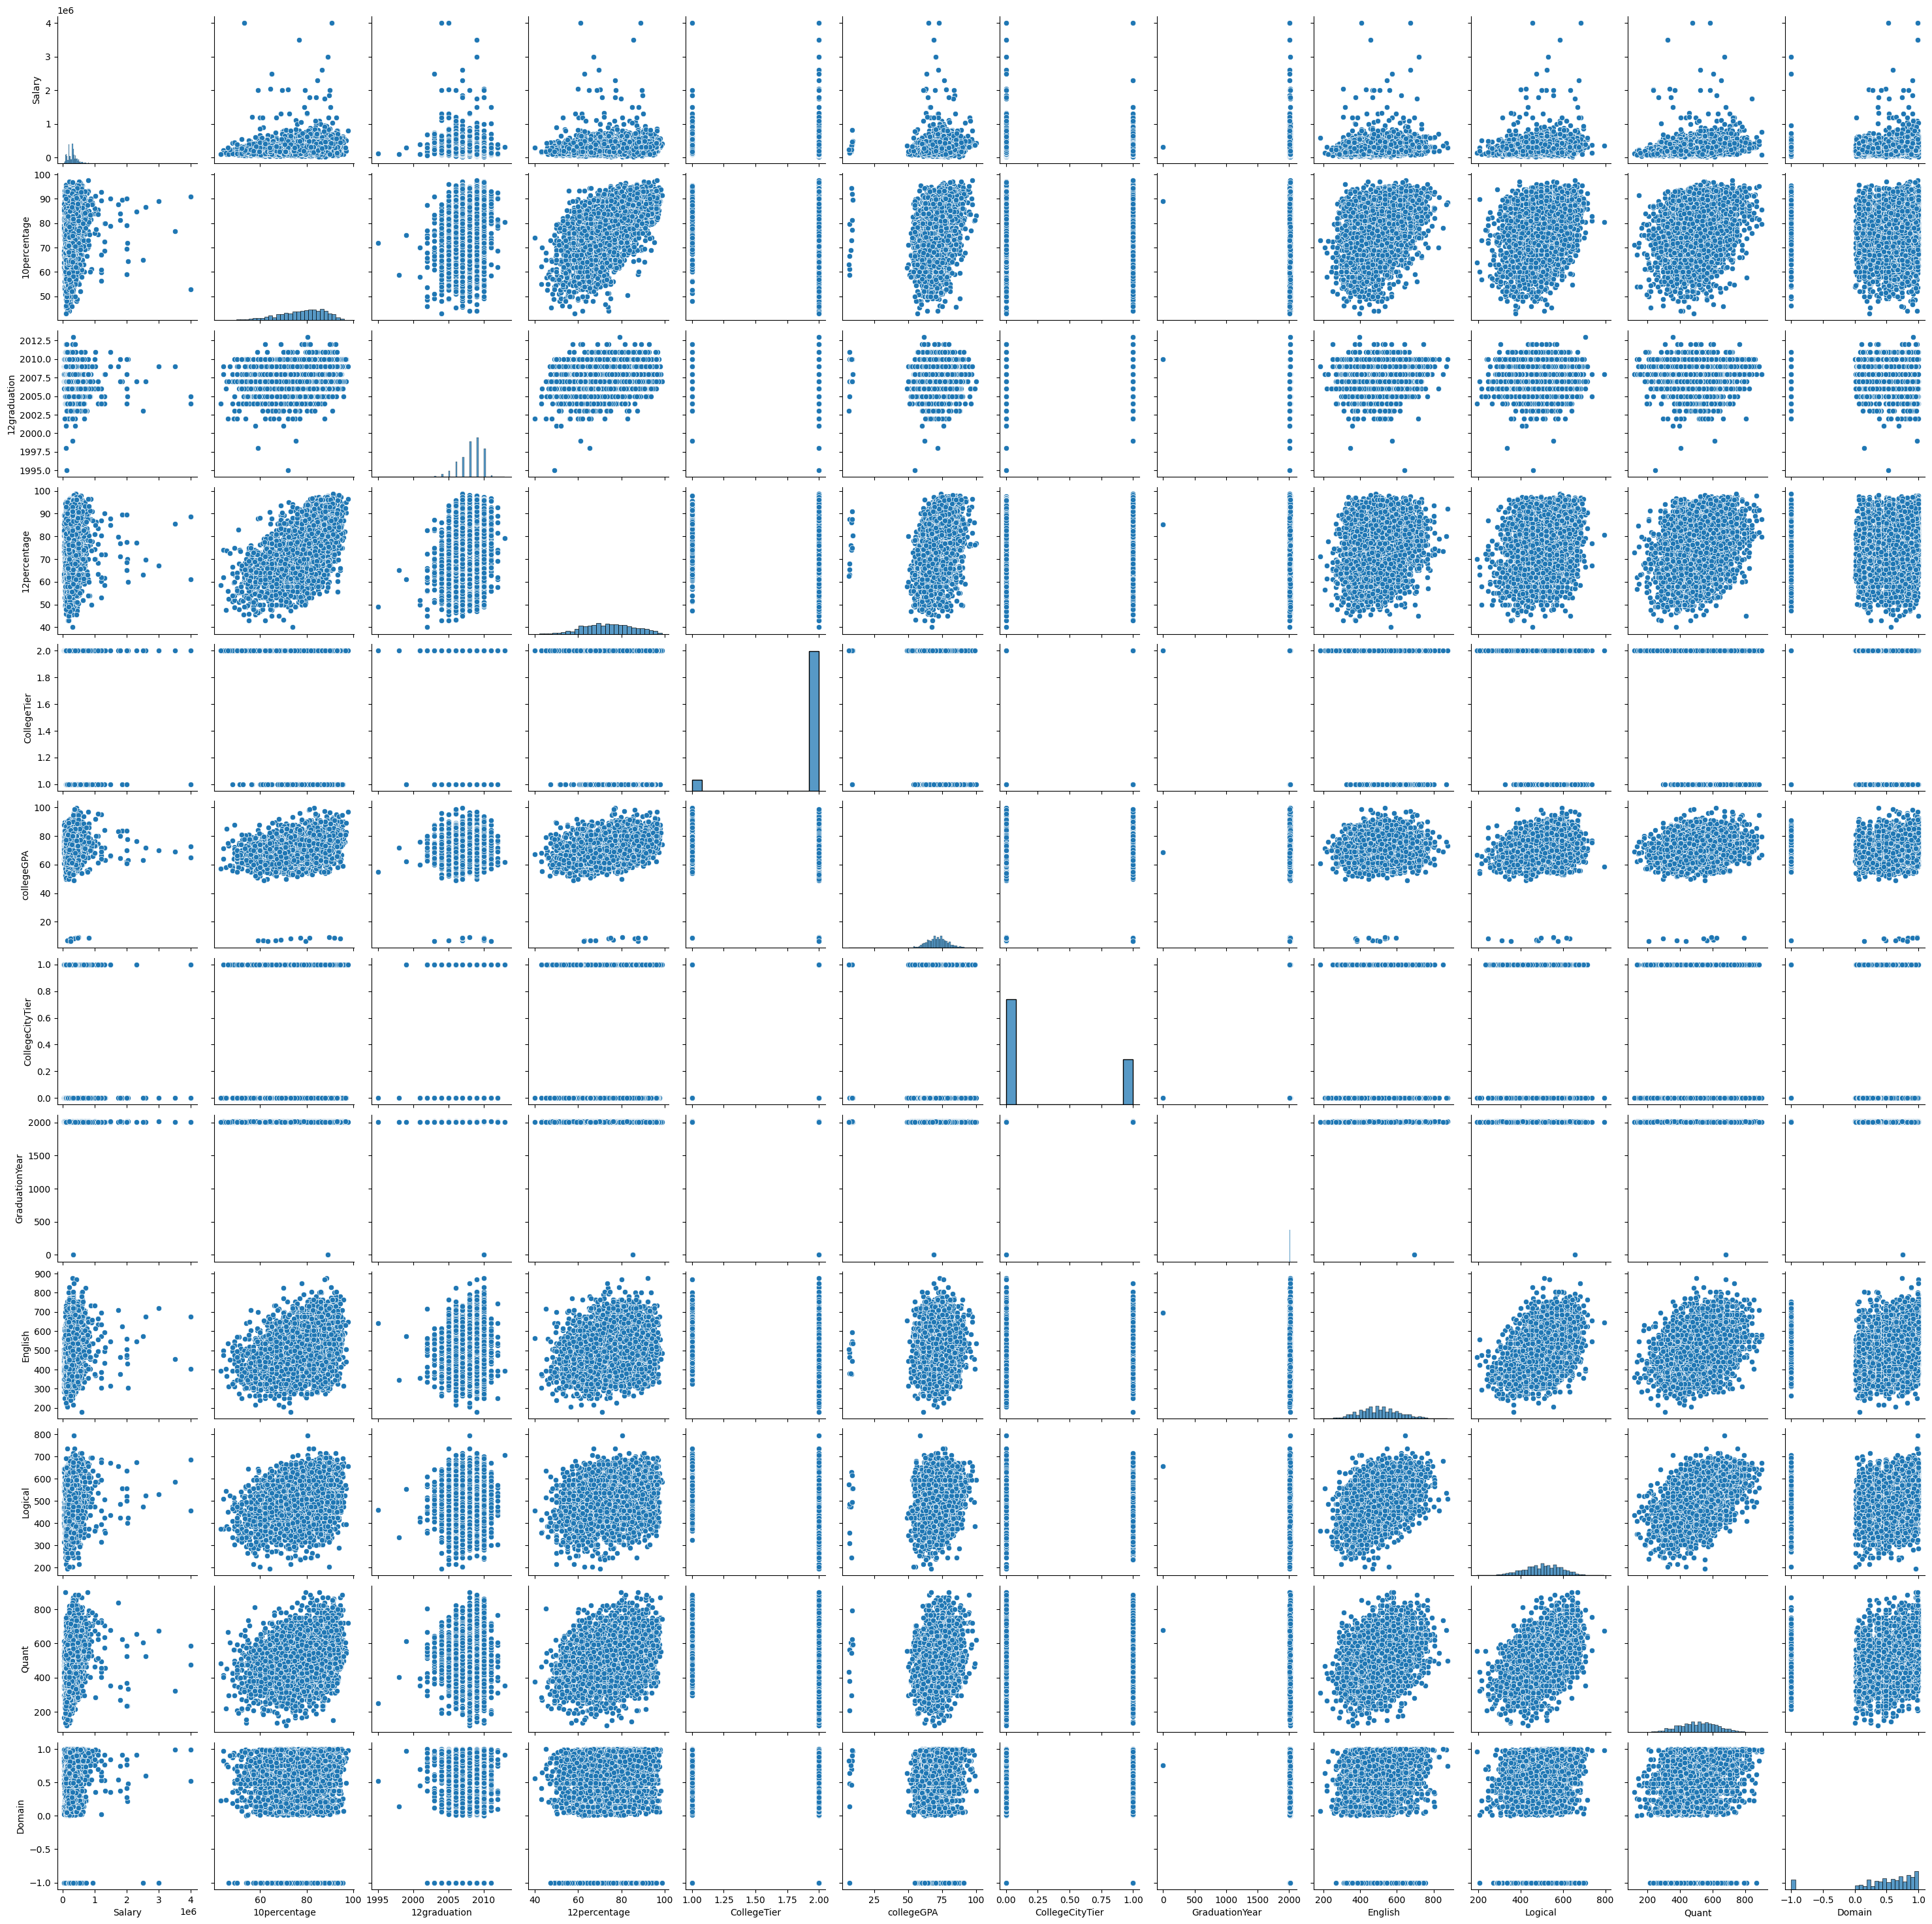

In [60]:
sns.pairplot(df_numeric)

**Observation :- Pairplot is the combination of Scatter Plot and Histogram.**

<Axes: >

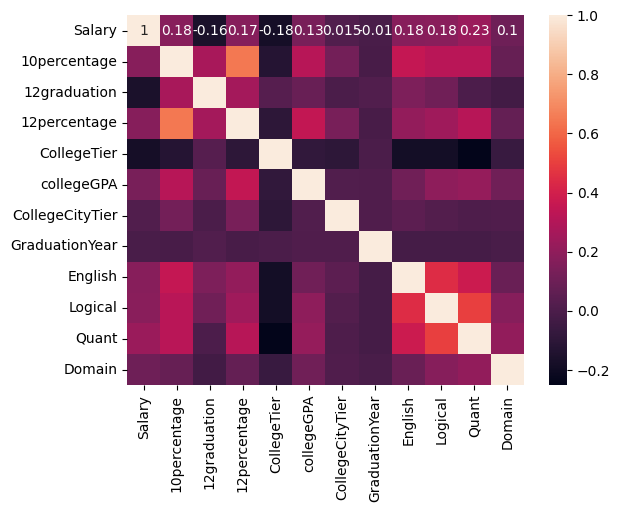

In [61]:
sns.heatmap(df_numeric.corr(numeric_only=True),annot=True)

* **Above Heatmap showing :-**
* Ranges -0.2 to +0.4 represnting Negative correlation which is shown by dark colour.
* Ranges +0.5 to +1.0 respreseting Positive correlation which is shown by light colour.
* 10th Percentage and 12th Percentage of employees is having correlation.

In [54]:
df.to_csv('AMCAT.csv')